# Creating our Model

After some thought I realized I could probably write my own algorithm to determine the output I wanted here. The original question I had in mind was something along the lines of, can we estimate copies sold based off of a game's platform, genre, and publisher? I figured a good method for doing so would be to filter out our top publishers, group our data by a composite of our features (i.e. we would create a multi-index [platform, genre, publisher]) and compute average copies sold for our grouped dataframe.

This would allow queries like: "How many copies can we expect a Sports game made for the PS2 by Electronic Arts to sell?" **see answer below** 

In [71]:
import pandas as pd
import seaborn as sns
%matplotlib inline

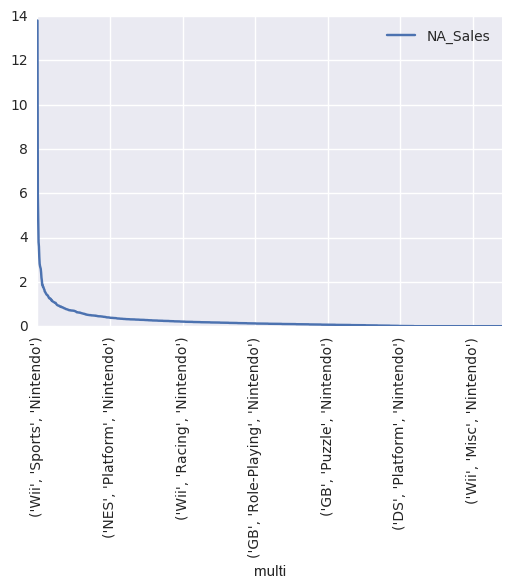

In [81]:
df = pd.read_csv("./vgsales.csv")
drop_columns = ["Name", "Rank", "Global_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
categorical = ["Platform", "Genre", "Publisher"]

# drop our columns
df.drop(drop_columns, axis = 1, inplace = True)

# filter for our top 10 publishers
top_publishers = list(
    df.groupby("Publisher").count()\
    .sort_values("Platform", ascending=False)\
    .head(10).index
)

df = df.loc[df.Publisher.isin(top_publishers)]

# cast our variables as categorical
for column in categorical:
    df[column] = df[column].astype("category")

# feature_names = [col for col in df.columns if col != "NA_Sales"]
# target_name = "NA_Sales"

# features = df[feature_names]
# targets = df[target_name]

levels = zip(df.Platform, df.Genre, df.Publisher)
df["multi"] = levels

df[['multi', "NA_Sales"]].groupby("multi").median()\
    .sort_values("NA_Sales", ascending=False)\
    .plot.line()\
    .set_xticklabels(df["multi"].unique(), rotation="vertical")

In [92]:
# function to get predictions from
def query(platform, genre, publisher):
    return "{} copies in NA".format(df.loc[df["multi"] == (platform, genre, publisher)].median()["NA_Sales"]*1000000)

In [93]:
query("PS2", "Sports", "Electronic Arts")

'470000.0 copies in NA'